
<h2 style="text-align: center;"><span style="color: #ff9900;"><strong>Upgrad</strong></span></h2>
<h2 style="text-align: center;"><span style="color: #333399;"><strong>Capstone Project Credit Card Fraud Detection</strong></span></h2>
<h2 style="text-align: center;"><span style="color: #333399;"><strong>By</strong></span></h2>
<h2 style="text-align: center;"><span style="color: #333399;"><strong>Steaphen antony Venasious &amp;&nbsp;Gowtham Saraswathi</strong></span></h2>
<h2 style="text-align: center;"><span style="color: #333399;"><a style="color: #333399;" href="mailto:Steve@awok.com,gowthamjan11@gmail.com"><strong>Steve@awok.com & gowthamjan11@gmail.com </strong></a><strong>&nbsp; </strong></span></h2>
<p><span style="color: #333399;">&nbsp;</span></p>
<h2 style="text-align: center;">The aim of this project is to predict fraudulent credit card transactions using machine learning models.&nbsp; The data set that was provided to during this project was obtained from Kaggle. It contains thousands of individual transactions that took place over a course of two days and their respective labels.</h2>

In [7]:

# the Data is provided from https://www.kaggle.com/mlg-ulb/creditcardfraud

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

from scipy import interp
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

ModuleNotFoundError: No module named 'imblearn'

## Begining with Exploratory data analysis


In [2]:
df = pd.read_csv('credit_fraud.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#check for any null values
df.isnull().sum().all()

False

##### No null values found

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.shape

(284807, 31)

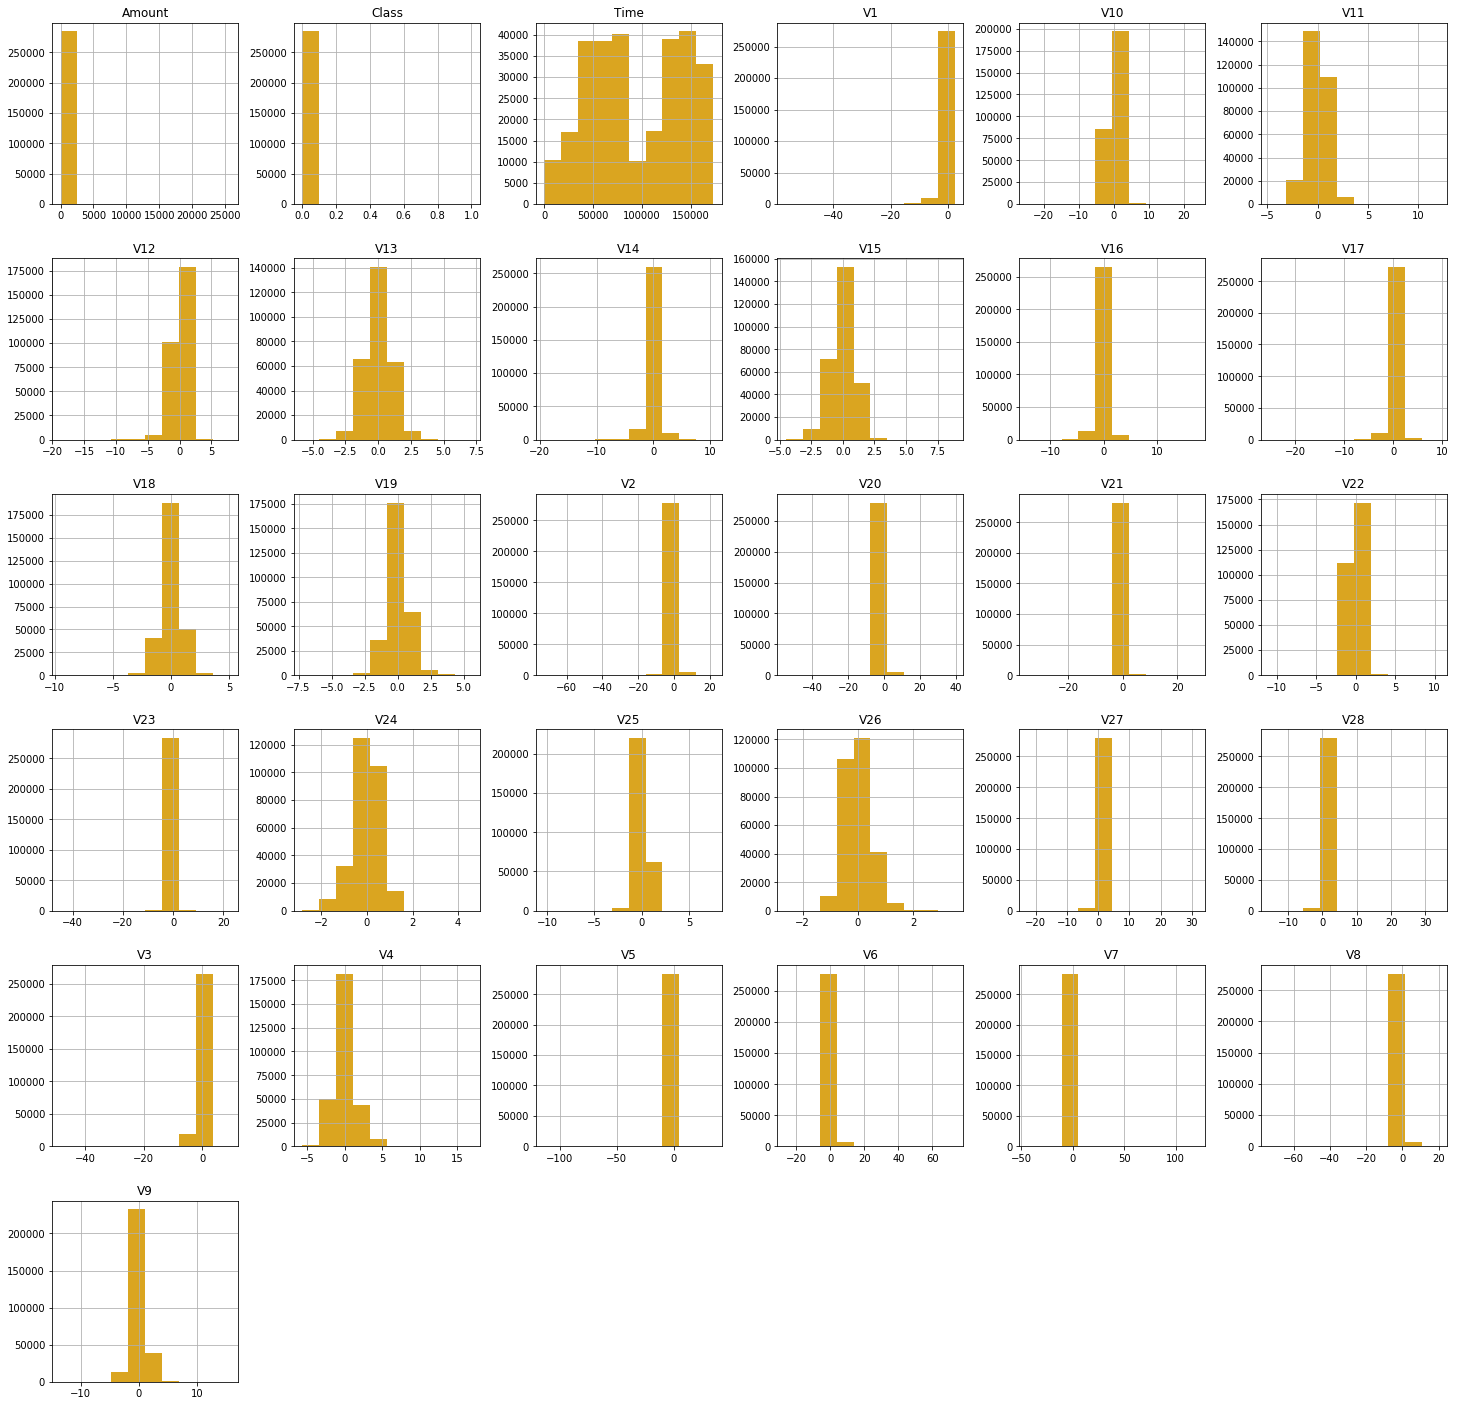

In [6]:
#observe the different feature type present in the data
=import pandas as pd # for procesing data - import csv file and manipulate data
import matplotlib.pyplot as plt # for visual representation of data
import sklearn as sk # 
import seaborn as sns # for interactive graphs
import datetime # for date and time
import random

creditcardtransdata = pd.read_csv('Capstone Project - Credit Card Fraud Detection.csv' , low_memory=False)
#creditcardtransdata.hist(figsize=(20,20), color = "green" )
creditcardtransdata.hist(figsize = (25, 25),color = "#DAA520")
plt.show()


Here we will observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


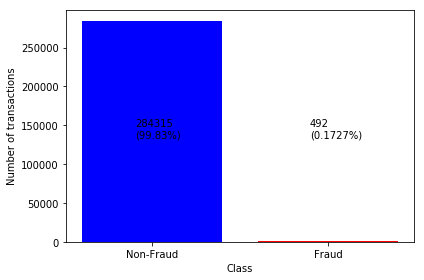

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.bar(['Non-Fraud','Fraud'], df['Class'].value_counts(), color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(classes[0], 
                                         df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(classes[1], 
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()

#### The classes are highly imbalanced with 99.83% of observations belonging to non-fraudulent transactions and only 0.17% of observations labeled as fraudulent. Needs to handle this imbalance.

Text(0, 0.5, 'Frequency')

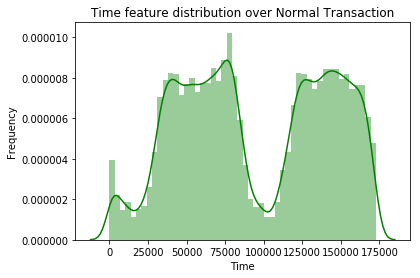

In [10]:
# Create a scatter plot to observe the distribution of classes with time
fraud = df[df.Class == 1]
normal = df[df.Class == 0]
sns.distplot(normal.Time, color='g')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

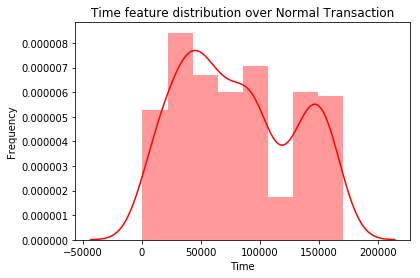

In [11]:
sns.distplot(fraud.Time, color='r')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

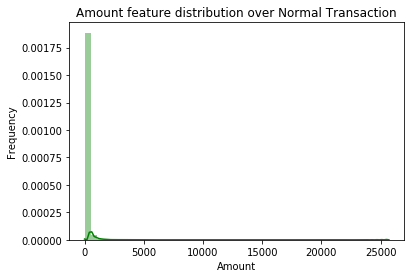

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount

sns.distplot(normal.Amount, color='g')
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

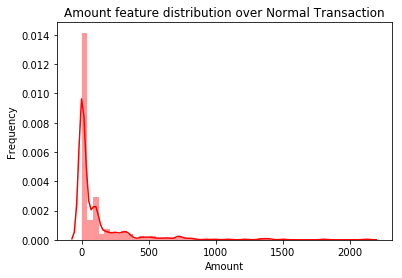

In [13]:
sns.distplot(fraud.Amount, color='r')
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

Number of outliers below the lower bound:  0  (0.0%)
Number of outliers above the upper bound:  31904  (11.2%)


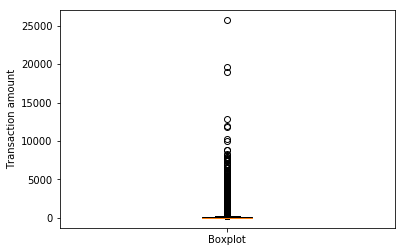

In [14]:
plt.boxplot(df['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction amount')
plt.plot()

amount = df[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print('Number of outliers below the lower bound: ', amount[amount['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount[amount['Amount'] < lower_bound].count()[0] / amount['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

The interquartile range method found 31904 outliers. Removing them from the dataset would be a bad idea due to the loss of a large amount of information for the machine learning models

In [15]:
# Drop unnecessary columns

df[df['Class']==1].where(df['Amount']>upper_bound).count()['Amount']

91

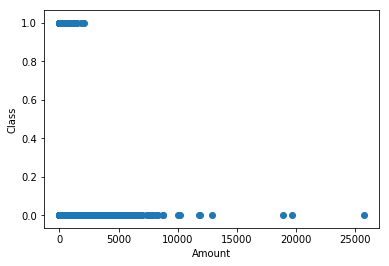

In [16]:
plt.scatter(df['Amount'], df['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

### Splitting the data into train & test data

In [17]:
from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

y= df['Class']
X = df.drop(columns=['Class'])

In [18]:
#Split the dataset into 70% training data and 30% testing data.
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)
print("X_train.shape : ", X_train.shape)
print("X_test.shape  : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape  : ", y_test.shape)

X_train.shape :  (199364, 30)
X_test.shape  :  (85443, 30)
y_train.shape :  (199364,)
y_test.shape  :  (85443,)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [19]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

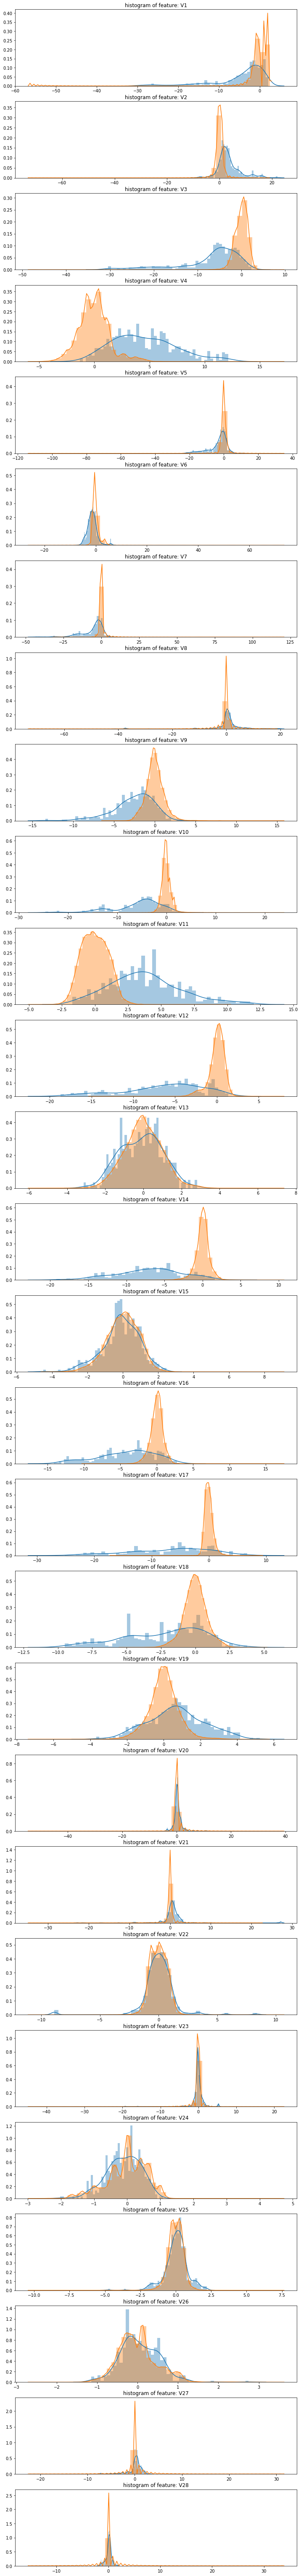

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i in range(1, 29):
    ax = plt.subplot(gs[i-1])
    sns.distplot(df['V'+str(i)][df.Class == 1], bins=50)
    sns.distplot(df['V'+str(i)][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + 'V'+str(i))
plt.show()
plt.tight_layout()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

def plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test):
    '''Plots the ROC curve and the confusion matrix, and calculates AUC, recall and precision.'''
    
    name = classifier[0]
    classifier = classifier[1]

    mean_fpr = np.linspace(0, 1, 100)
    class_names = ['Non-Fraud', 'Fraud']
    confusion_matrix_total = [[0, 0], [0, 0]]
    print(classifier)
    
    #Obtain probabilities for each class
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve - model: ' + name)
    plt.legend(loc="lower right")
    plt.show()
    
    #Store the confusion matrix result to plot a table later
    y_pred=classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrix_total += cnf_matrix
    
    #Print precision and recall
    tn, fp = confusion_matrix_total.tolist()[0]
    fn, tp = confusion_matrix_total.tolist()[1]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy = {:2.2f}%'.format(accuracy*100))
    print('Precision = {:2.2f}%'.format(precision*100))
    print('Recall = {:2.2f}%'.format(recall*100))
    
    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(confusion_matrix_total, classes=class_names, title='Confusion matrix - model: ' + name)
    plt.show()

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [24]:
lr_predict = lr.predict(X_test)

##### Prediction Scores

Accuracy: 99.9029%
Recall: 58.7838%
ROC AUC: 79.3790%


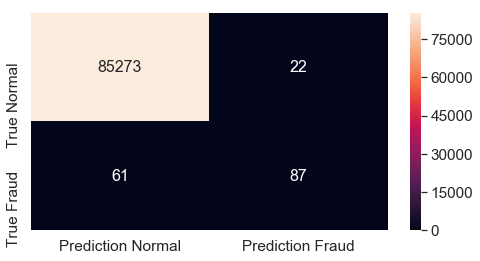

In [25]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot

lr_accuracy = accuracy_score(y_test, lr_predict)
lr_recall = recall_score(y_test, lr_predict)
lr_cm = confusion_matrix(y_test, lr_predict)
lr_auc = roc_auc_score(y_test, lr_predict)

print("Accuracy: {:.4%}".format(lr_accuracy))
print("Recall: {:.4%}".format(lr_recall))
print("ROC AUC: {:.4%}".format(lr_auc))

lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

### Fitting the models and calculating test and training score

In [26]:
classifier= {
    'Logistic Regression':LogisticRegression()
}

import warnings
warnings.filterwarnings('ignore')

In [27]:
for key,values in classifier.items():
    values.fit(X_train,y_train)
    training_score= cross_val_score(values,X_train,y_train,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, X_train, y_train, cv=5)
    print('Roc_Auc training score for {} is {}: '.format(key, round(roc_auc_score(y_train,train_pred)*100,2)))
    test_score= cross_val_score(values,X_test,y_test,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, X_test, y_test, cv=5)
    print('Roc_Auc test score for {} is {}: '.format(key, round(roc_auc_score(y_test,test_pred)*100,2)))
    print('---'*30)

Training accuracy score of Logistic Regression is 99.9
Roc_Auc training score for Logistic Regression is 84.28: 
Test accuracy score of Logistic Regression is 99.87
Roc_Auc test score for Logistic Regression is 80.71: 
------------------------------------------------------------------------------------------


#### Hyper Parameter Tuning using GridSearchCv

In [28]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
logreg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knn_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
decision_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

classifier= {
    'Logistic Regression':LogisticRegression()
}

def grid_search(classifier,Param):
    grid_log_reg = GridSearchCV(classifier,param_grid=Param)
    grid_log_reg.fit(X_train, y_train)
    best_param = grid_log_reg.best_estimator_
    print('{} algorithm best parameter are : {}'.format(classifier.__class__.__name__,best_param))



In [29]:
grid_search(LogisticRegression(),logreg_params)

LogisticRegression algorithm best parameter are : LogisticRegression(C=0.1)


In [30]:
log_reg=  LogisticRegression(C=0.1)

log_reg.fit(X_train,y_train)

LogisticRegression(C=0.1)

In [31]:
log_reg_pred = cross_val_predict(log_reg, X_test, y_test, cv=5,method="decision_function")

In [32]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold= roc_curve(y_test,log_reg_pred)

Text(0.5, 1.0, 'Auc Score is :0.9097788596967915')

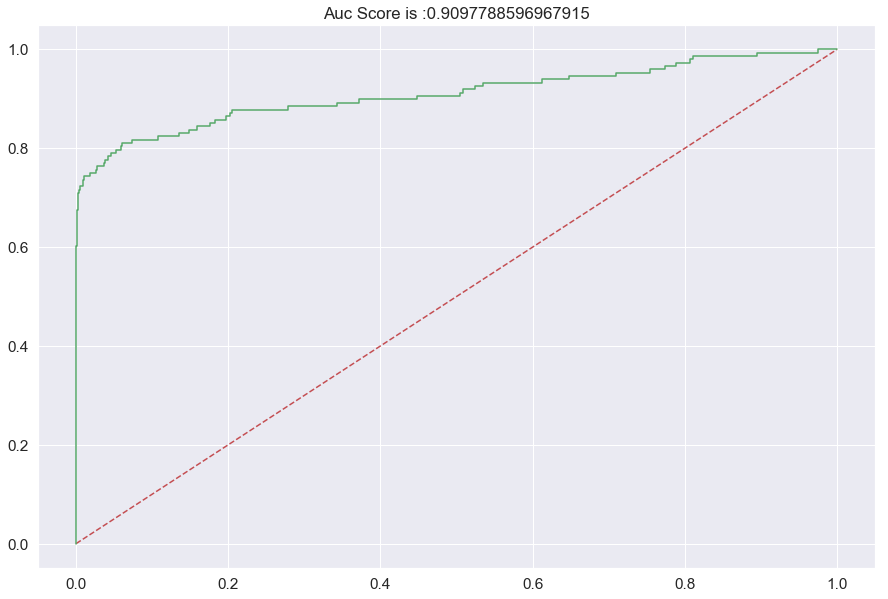

In [33]:
plt.figure(figsize=(15,10))
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,'g')
plt.title('Auc Score is :'+str(auc(fpr,tpr)))

In [35]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_test)

print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.70
Precision Score: 0.75
F1 Score: 0.72
Accuracy Score: 1.00


In [36]:
classifier= {
    'KNN':KNeighborsClassifier(),
    #'SVC':SVC(), #taking lot o ftime
    'DecisionTree':DecisionTreeClassifier()
}

import warnings
warnings.filterwarnings('ignore')

In [37]:
for key,values in classifier.items():
    values.fit(X_train,y_train)
    training_score= cross_val_score(values,X_train,y_train,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, X_train, y_train, cv=5)
    print('Roc_Auc training score for {} is {}: '.format(key, round(roc_auc_score(y_train,train_pred)*100,2)))
    test_score= cross_val_score(values,X_test,y_test,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, X_test, y_test, cv=5)
    print('Roc_Auc test score for {} is {}: '.format(key, round(roc_auc_score(y_test,test_pred)*100,2)))
    print('---'*30)

Training accuracy score of KNN is 99.84
Roc_Auc training score for KNN is 53.92: 
Test accuracy score of KNN is 99.83
Roc_Auc test score for KNN is 51.01: 
------------------------------------------------------------------------------------------
Training accuracy score of DecisionTree is 99.92
Roc_Auc training score for DecisionTree is 86.9: 
Test accuracy score of DecisionTree is 99.91
Roc_Auc test score for DecisionTree is 85.45: 
------------------------------------------------------------------------------------------


KNeighborsClassifier()


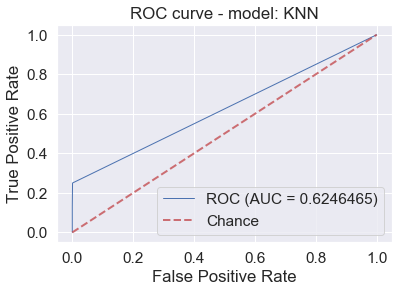

Accuracy = 99.84%
Precision = 100.00%
Recall = 8.78%


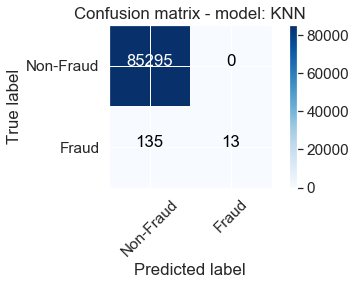

DecisionTreeClassifier()


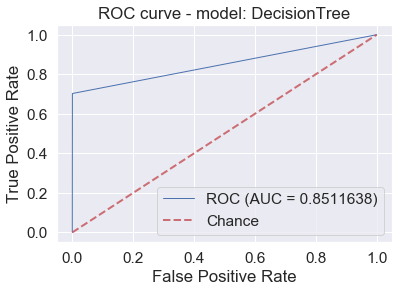

Accuracy = 99.91%
Precision = 76.47%
Recall = 70.27%


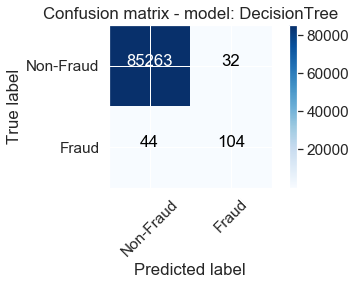

In [42]:
for clf in classifier.items():
    plot_CM_and_ROC_curve(clf, X_train, y_train, X_test, y_test)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

In [211]:
#oversampling
over_sample = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_ovs, y_ovs = over_sample.fit_resample(X_train, y_train)

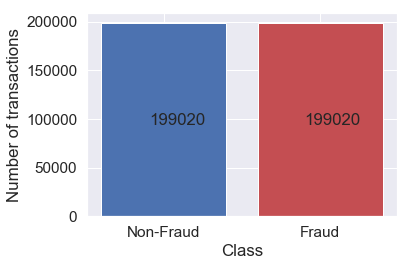

In [212]:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_ovs)[0], Counter(y_ovs)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_ovs)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_ovs)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [215]:
classifier= {
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
     #'SVC':SVC(), #taking lot o ftime
    'DecisionTree':DecisionTreeClassifier()
}

import warnings
warnings.filterwarnings('ignore')

In [214]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
#svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}


def grid_search(classifier,Param):
    grid_log_reg = GridSearchCV(classifier,param_grid=Param)
    grid_log_reg.fit(X_ovs, y_ovs)
    best_param = grid_log_reg.best_estimator_
    print('{} algorithm best parameter are : {}'.format(classifier.__class__.__name__,best_param))

grid_search(LogisticRegression(),log_reg_params)
grid_search(KNeighborsClassifier(),log_reg_params)

LogisticRegression algorithm best parameter are : LogisticRegression(C=0.001)


In [86]:
for key,values in classifier.items():
    values.fit(X_ovs,y_ovs)
    training_score= cross_val_score(values,X_ovs,y_ovs,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, X_train, y_train, cv=5)
    print('Roc_Auc training score for {} is {}: '.format(key, round(roc_auc_score(y_train,train_pred)*100,2)))
    test_score= cross_val_score(values,X_test,y_test,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, X_test, y_test, cv=5)
    print('Roc_Auc test score for {} is {}: '.format(key, round(roc_auc_score(y_test,test_pred)*100,2)))
    print('---'*30)

Training accuracy score of Logistic Regression is 94.69
Roc_Auc training score for Logistic Regression is 82.83: 
Test accuracy score of Logistic Regression is 99.88
Roc_Auc test score for Logistic Regression is 80.04: 
------------------------------------------------------------------------------------------


('Decision Tree', DecisionTreeClassifier(random_state=42))
DecisionTreeClassifier(random_state=42)


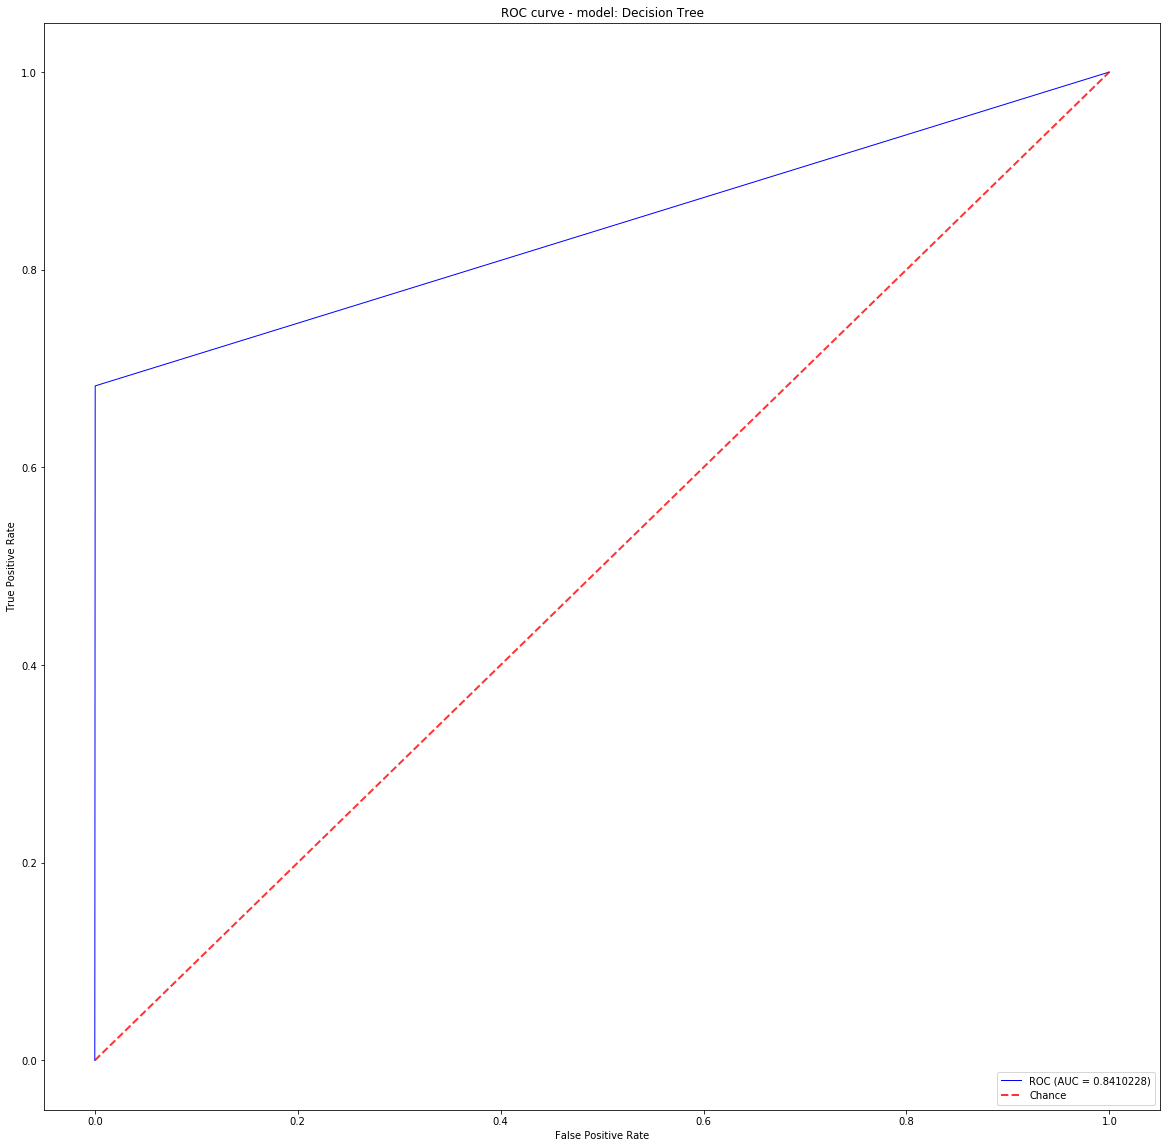

Accuracy = 99.91%
Precision = 75.37%
Recall = 68.24%


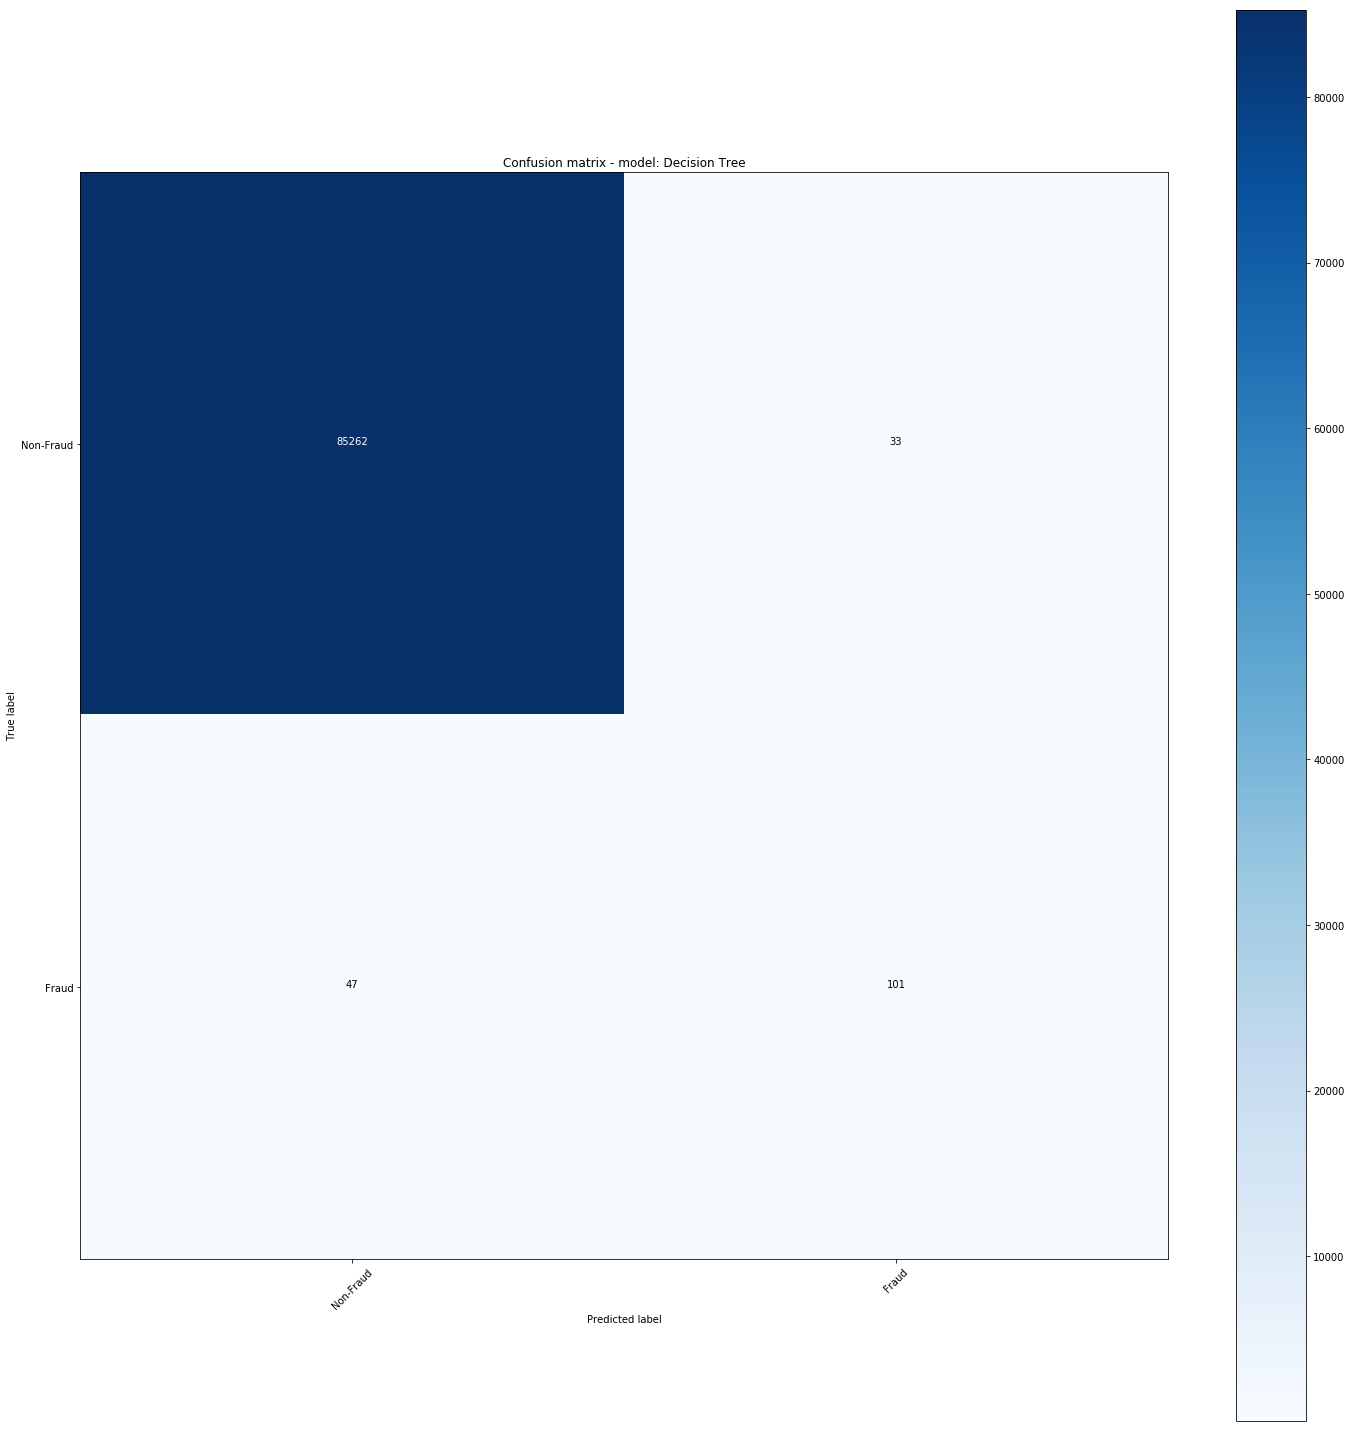

In [116]:
for values in classifier.items():
    print(clf)
    plot_CM_and_ROC_curve(clf, X_ovs, y_ovs, X_test, y_test)

## Model Building
- Build different models on the balanced dataset and see the result

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

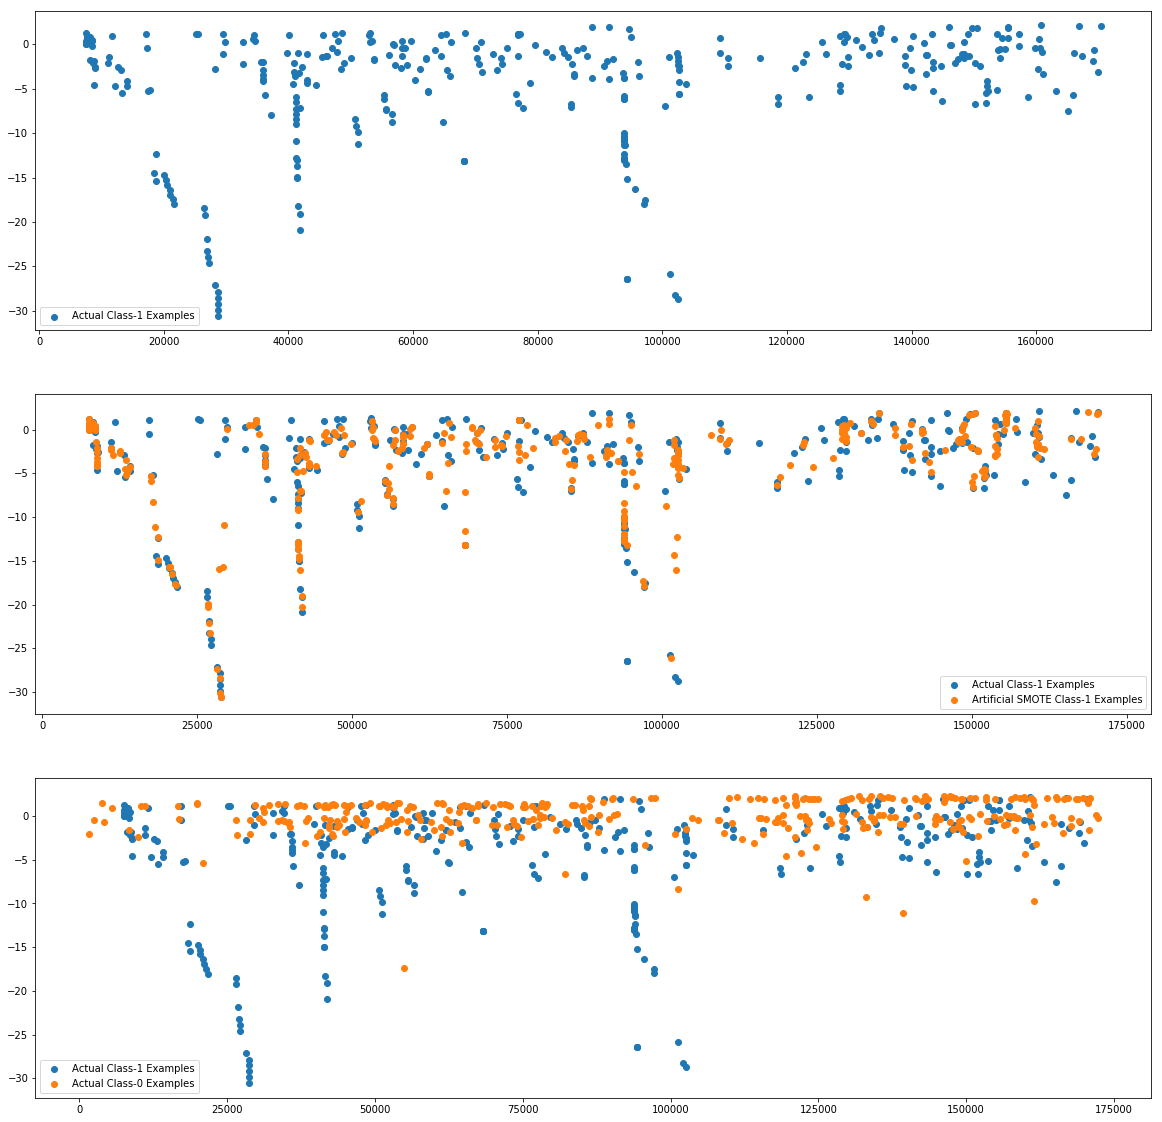

In [54]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

DecisionTreeClassifier(random_state=42)


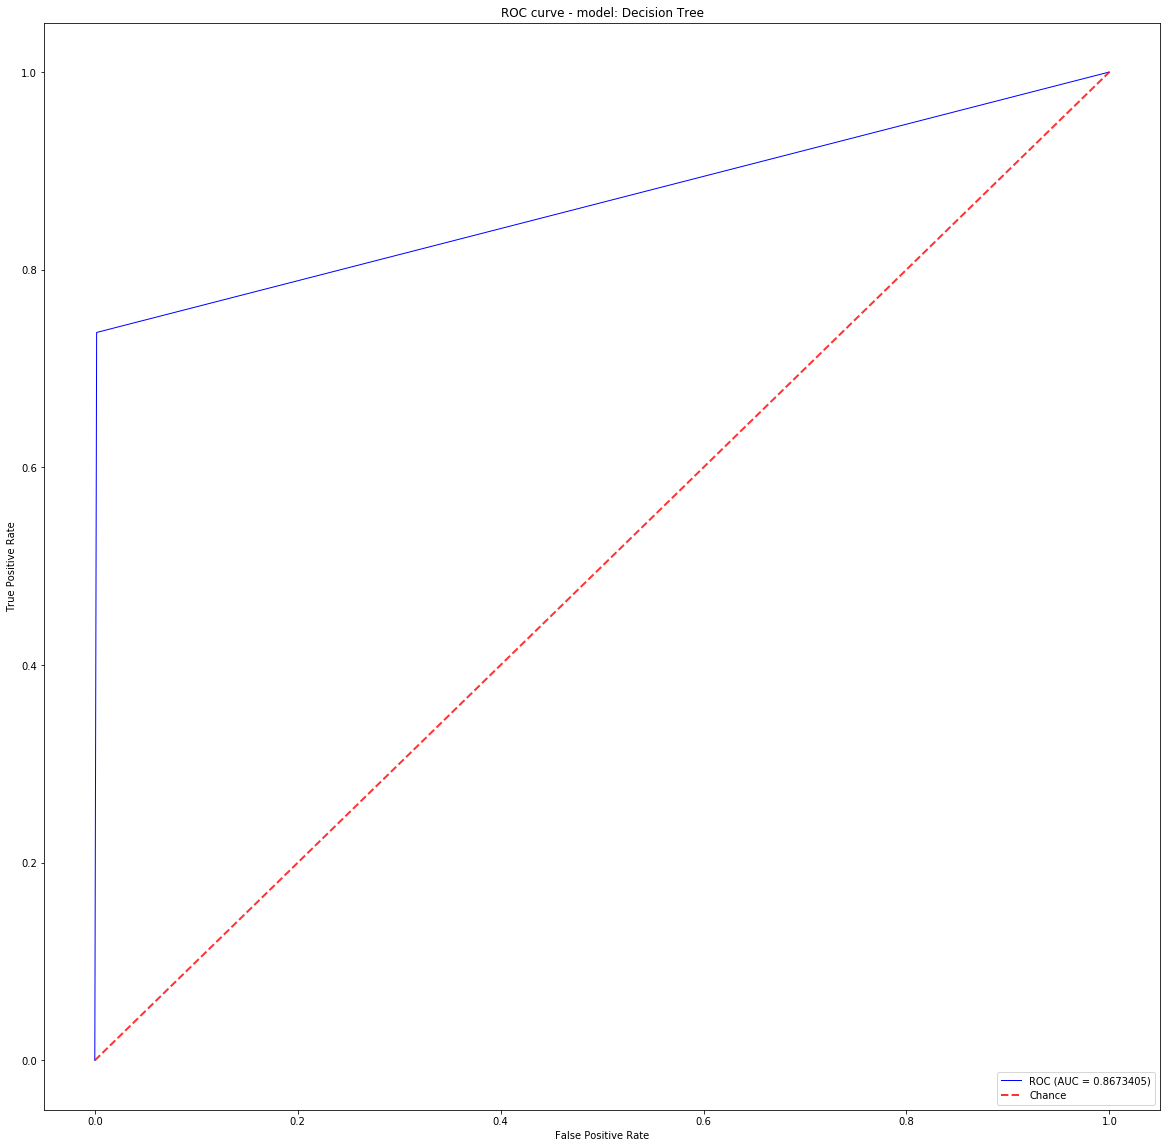

Accuracy = 99.77%
Precision = 41.44%
Recall = 73.65%


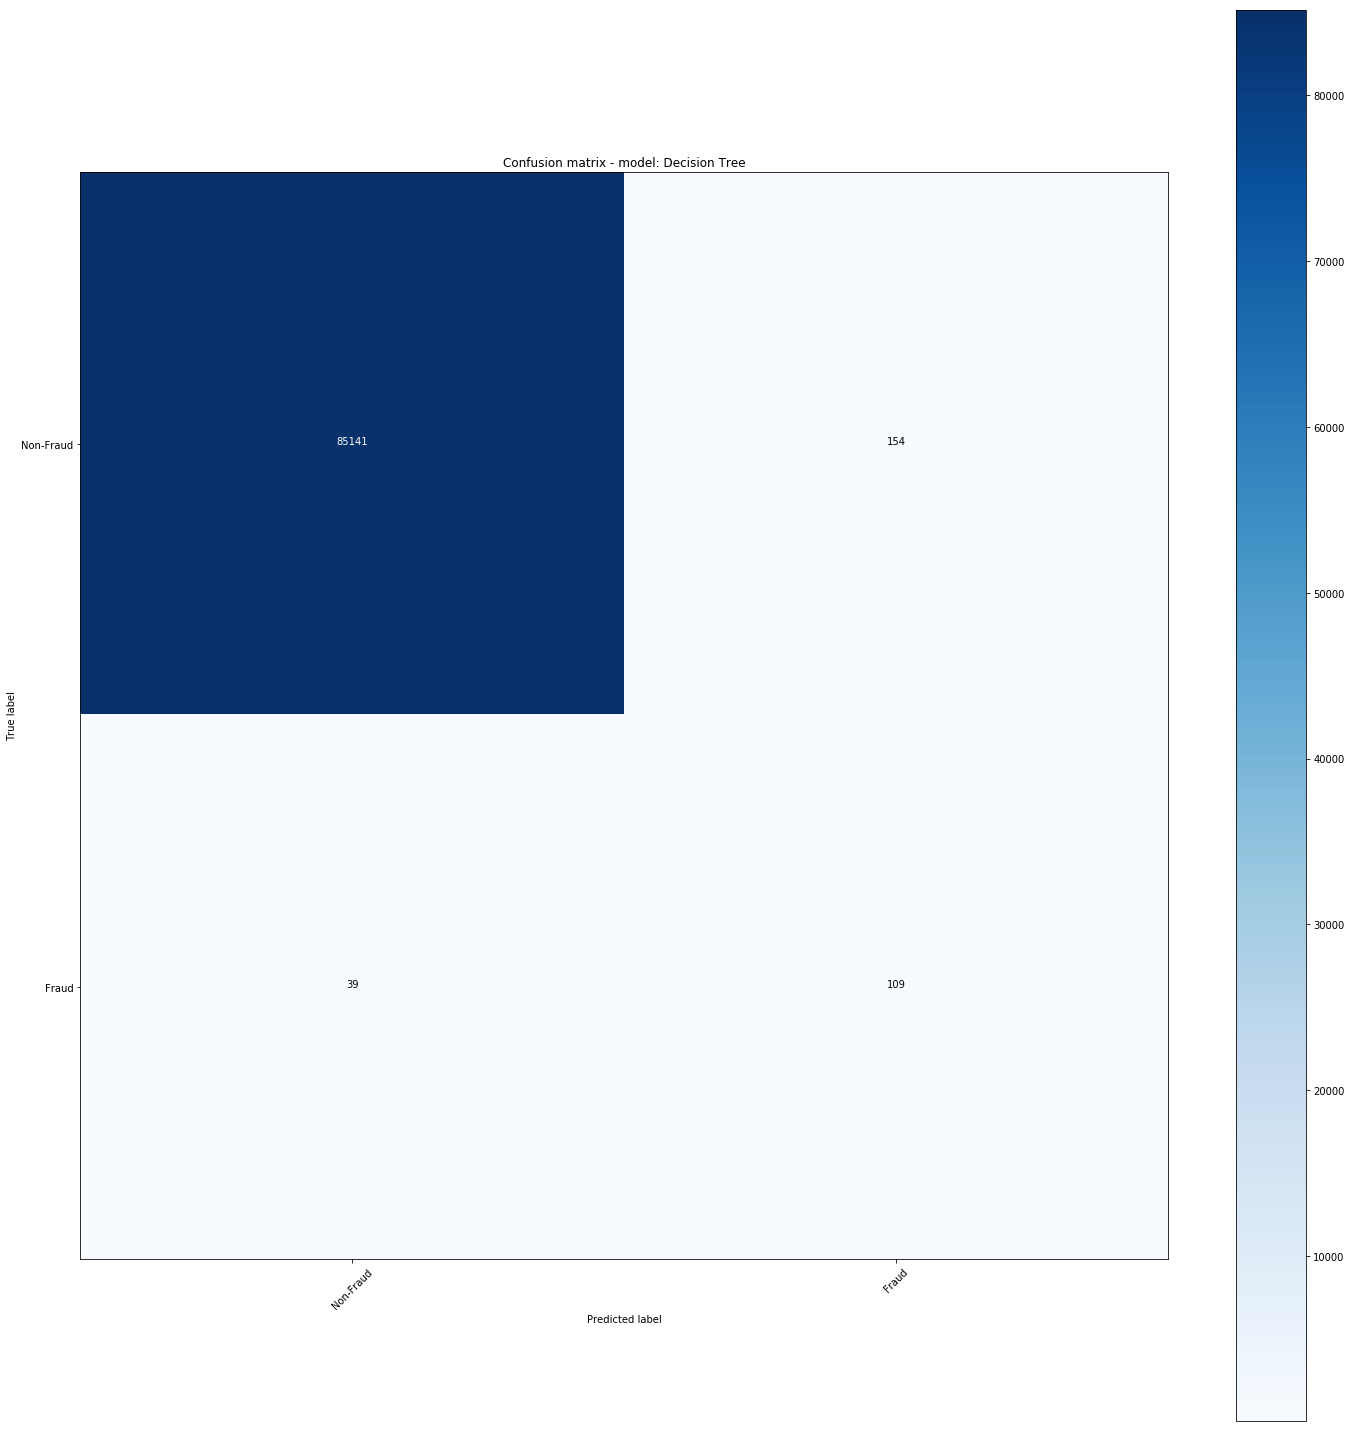

In [117]:
for values in classifier.items():
    plot_CM_and_ROC_curve(values, X_train_smote, y_train_smote, X_test, y_test)

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

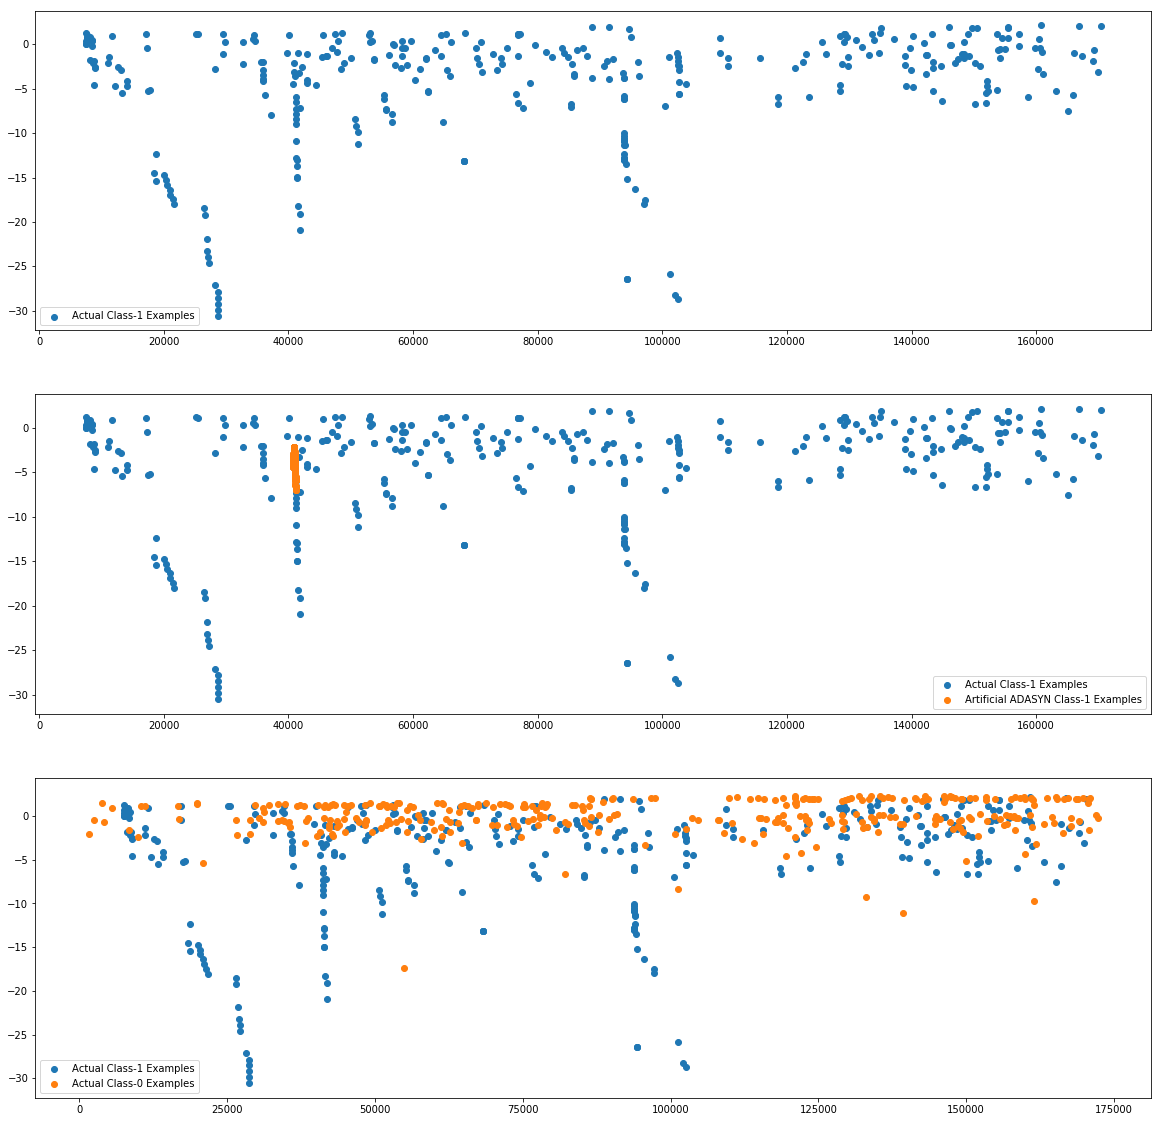

In [51]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

LogisticRegression()


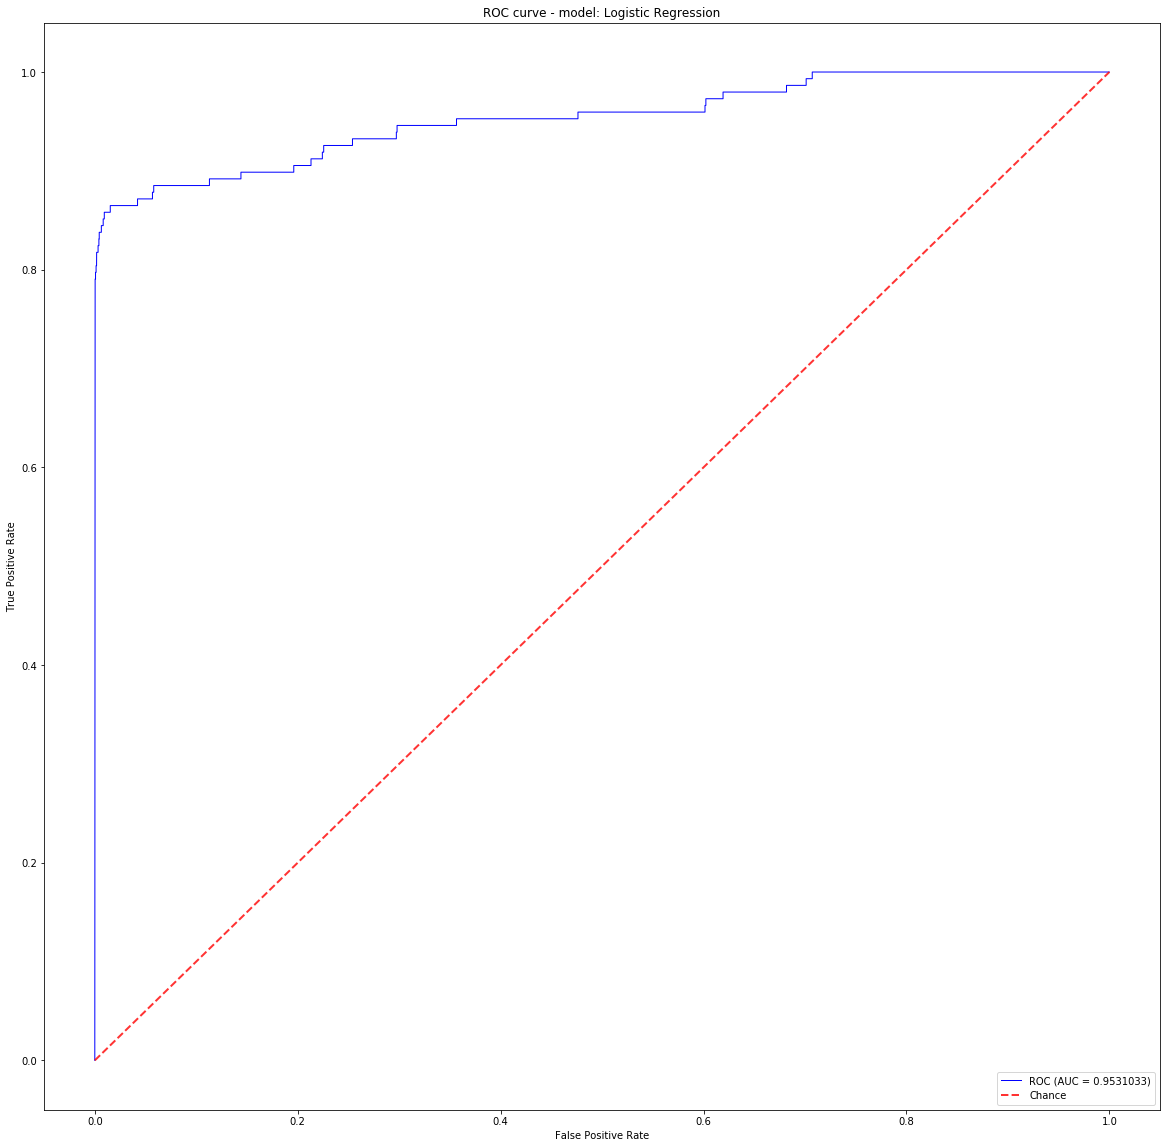

Accuracy = 98.25%
Precision = 7.98%
Recall = 86.49%


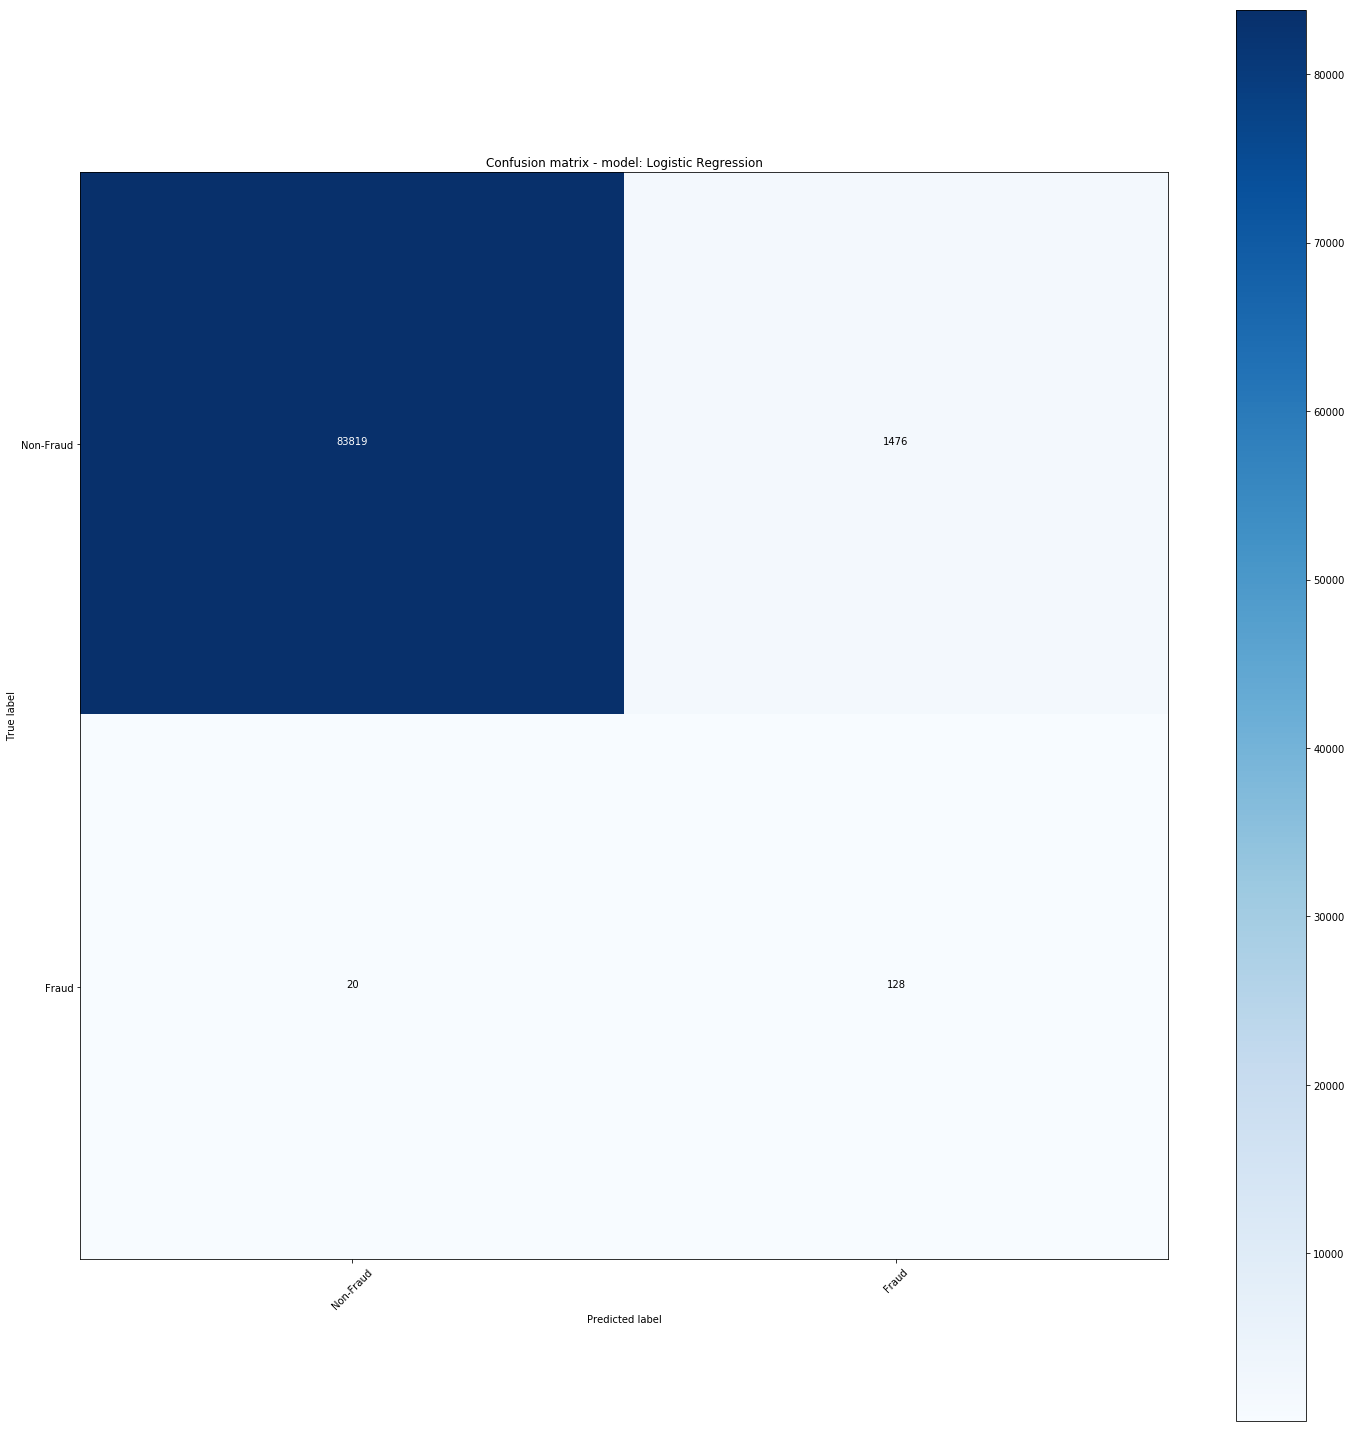

In [120]:
for values in classifier.items():
    plot_CM_and_ROC_curve(values, X_train_adasyn, y_train_adasyn, X_test, y_test)

##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

<h1 style="text-align: left;">Our&nbsp;Observations On Fraudulent Credit card transactions</h1>
<ul style="list-style-type: square;">
<li style="text-align: left;">
<h3 style="text-align: justify;"><span style="color: #993366;"><strong>In&nbsp;The Capstone Project To Find Credit Card transactions fraud detections&nbsp;&nbsp;we have used standard machine classification learning algorithms Logistic Regression,KNN, Decision Tree classifier,</strong></span></h3>
</li>
<li style="text-align: justify;">
<h3><span style="color: #993366;"><strong><br />When we used random undersampling the best model we found&nbsp; was a simple DecisionTreeClassifier with AUC = 0.9097, recall = 70% and precision = 75%.</strong></span></h3>
</li>
<li style="text-align: justify;">
<h3>&nbsp;</h3>
</li>
<li style="text-align: justify;">
<h3><span style="color: #993366;"><strong><br />While With the random oversampling method, the best model was a simple DecisionTreeClassifier with AUC = 0.04, recall = 70% and precision = 75%.</strong></span></h3>
</li>
<li style="text-align: justify;">
<h3>&nbsp;</h3>
</li>
<li style="text-align: justify;">
<h3><span style="color: #993366;"><strong><br />The analysis for SMOTE method is very similar to the random oversampling method.<br />An interesting result is that in all cases of resampling, <br />the highest AUC score among the simple models was using logistic regression with adasyn oversampling</strong></span></h3>
</li>
<li style="text-align: left;">
<h3 style="text-align: justify;"><span style="color: #993366;"><strong><br />So in our Opinion from the above obeservations the&nbsp; binary classification problems should have at least this model as a benchmark when the objective is to maximize the AUC.</strong></span></h3>
</li>
</ul>

<h3 style="text-align: left;"><span style="text-decoration: underline;"><strong>Also during this Capstone Project On Credit Card transactions fraud detection we have learned on what </strong></span></h3>
<ul style="list-style-type: circle;">
<li style="text-align: left;"><span style="color: #000080;"><strong>Ways and Methods to&nbsp; load and explore the <span style="text-decoration: underline;">d</span>ataset and generate ideas for data preparation and model selection.</strong></span></li>
<li style="text-align: left;"><span style="color: #000080;"><strong>Methods&nbsp; to systematically evaluate a suite of machine learning models with a strong test harness.</strong></span></li>
<li style="text-align: left;"><span style="color: #000080;"><strong>Methods&nbsp; to fit a final model and use it to predict the probability of fraud for specific cases</strong></span></li>
</ul>